# Пример экстраполяции FFT

In [56]:
import numpy as np
from numpy import pi
import pylab as pl
from numpy import fft
#from numpy.fft import ifft
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
def fourierExtrapolation(x, n_predict, n_harm = 10):
    n = x.size
    #n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    
    indexes.sort(key = lambda i: np.absolute(f[i])) # sort indexes by frequency, lower -> higher
    t = np.arange(0, n + n_predict)
    
    restored_sig = np.zeros(t.size)
    
    #for i in indexes[:1 + n_harm * 2]:
    #    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    #    phase = np.angle(x_freqdom[i])          # phase
    #    restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    
    restored_sig = sum(np.absolute(x_freqdom[i]) / n * np.cos(2 * np.pi * f[i] * t + np.angle(x_freqdom[i])) 
                       for i in indexes[:1 + n_harm * 2])
    
    return restored_sig + p[0] * t

In [101]:
x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 
              536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 
              812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 
              1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 
              1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 
              1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 
              1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692,
              1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 
              1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 
              1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 
              756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 
              1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558,
              1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 
              1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256,
              1009, 1175, 1176, 870, 856, 860])

In [102]:
n_predict = 100
extrapolation = fourierExtrapolation(x, n_predict, 25)

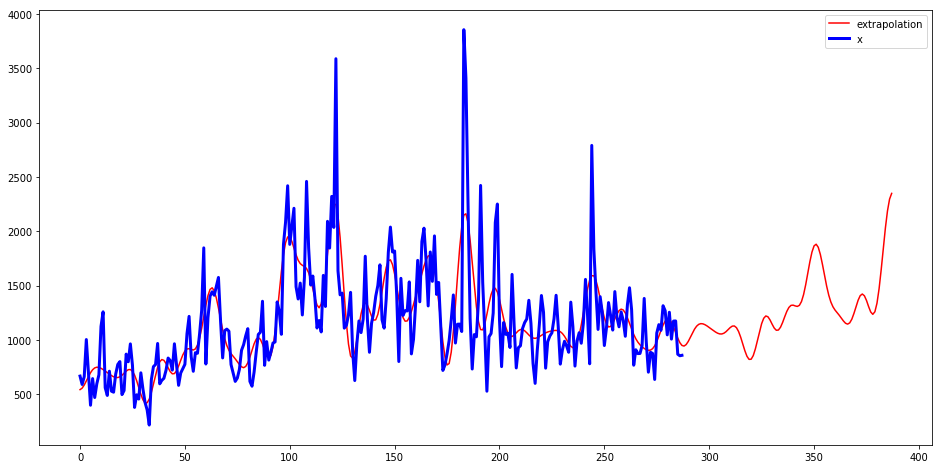

In [103]:
plt.rcParams['figure.figsize'] = [16, 8]
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

### Генерация данных с сезонностью

In [104]:
X = [i for i in range(365*5)]
slope = 5./365
b = 0.0
trend_Y = [i * slope + b for i in X]
seasonal_Y = [10*np.cos(2*pi * i /365. ) for i in X]
monthly_Y = [5*np.cos(2*pi * i /30. ) for i in X]

combined_Y = [a+b+c for (a,b,c) in zip(trend_Y, seasonal_Y, monthly_Y)]
x = np.array(combined_Y)

In [122]:
n_predict = 350 #355 almost perfect, 180 awful
extrapolation = fourierExtrapolation(x[:-n_predict], n_predict, 15)

In [123]:
len(x), len(x[:-n_predict]), len(x[-n_predict:])

(1825, 1475, 350)

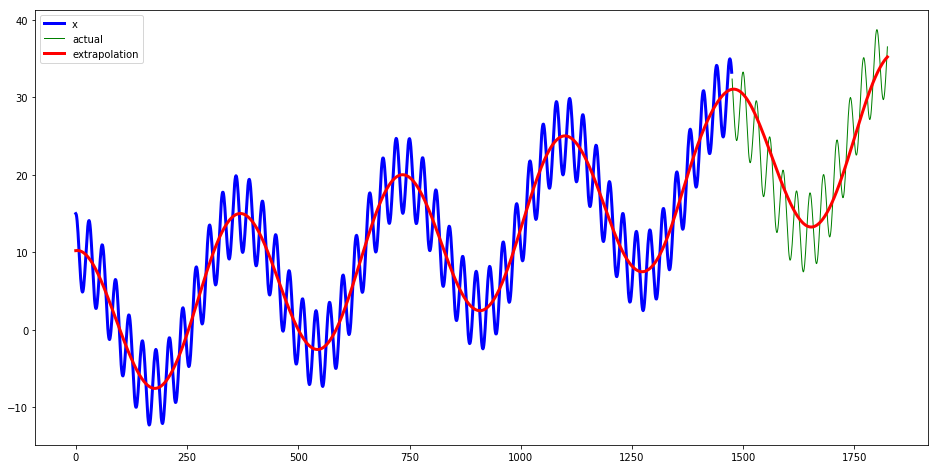

In [124]:
plt.rcParams['figure.figsize'] = [16, 8]
pl.plot(np.arange(0, x.size - n_predict), x[:-n_predict], 'b', label = 'x', linewidth = 3)
pl.plot(np.arange(len(x[:-n_predict]), len(x)), x[-n_predict:], 'g', label = 'actual', linewidth = 1)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation', linewidth = 3)
pl.legend()
plt.show()